Sparks Foundation #1 task prediction using supervised ML

Noorhan Hamed Sultan 

1) importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


2) load_dataset & show sample

In [2]:
df= pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


3) check null values & duplicates

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.duplicated().sum()

0

4)  Explore data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


5) visualization

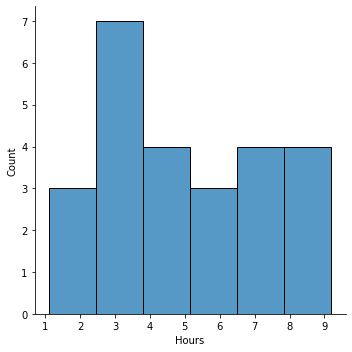

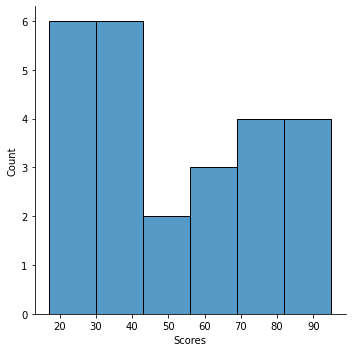

In [7]:
for col in df.columns:
    sns.displot(df, x= col)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

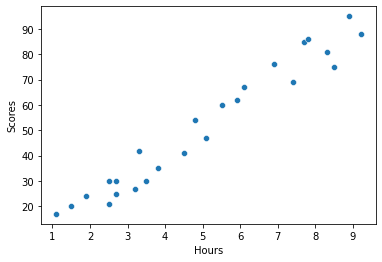

In [8]:
sns.scatterplot(data= df , x= 'Hours', y='Scores')

6)prepare for machine learning model 

In [9]:
x= df['Hours'].values
y= df['Scores'].values
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.15,random_state=7)

#Linear Regression

In [10]:
model= LinearRegression()

#train the model 

In [11]:
model.fit(x_train,y_train )

LinearRegression()

#evaluate the model 

In [12]:
model.score(x_train,y_train)

0.9557035985265413

In [13]:
model.score(x_test, y_test)

0.8833377406025319

In [14]:
y_train_pre = model.predict(x_train)
y_test_pre = model.predict(x_test)

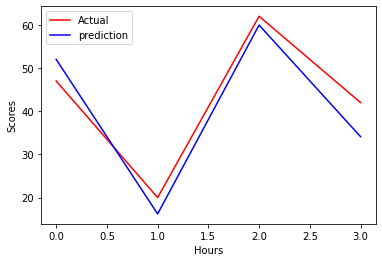

In [15]:
plt.plot(y_test, color='red',label='Actual')
plt.plot(y_test_pre, color='blue',label='prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


In [16]:
mean_squared_error(y_test ,y_test_pre , squared=False)

5.142555388827966

#make new predection

In [17]:
new_in= [9.25]
new_pre = model.predict([[9.25]])
print( f'for {new_in} hours the score is {new_pre}')

for [9.25] hours the score is [[93.26575456]]
